In [10]:
from pyforest import*
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import pandas as pd
import numpy as np

In [11]:
df=pd.read_csv('titanic_train1.csv')

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.shape

(891, 12)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<AxesSubplot:>

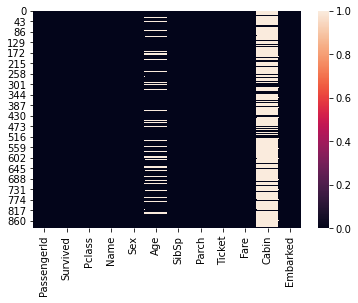

In [18]:
print(df.isnull().sum())
sns.heatmap(df.isnull())

In [19]:
un=['PassengerId','Cabin','Name']
for i in un:
    df.drop(i,axis=1,inplace=True)

<AxesSubplot:>

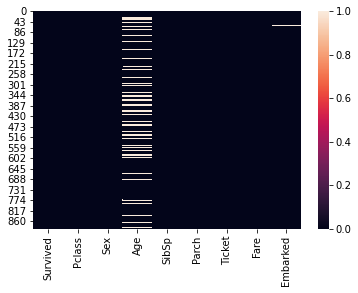

In [20]:
sns.heatmap(df.isnull())

In [25]:
from sklearn.impute import SimpleImputer
imput=SimpleImputer()
df['Age']=imput.fit_transform(df['Age'].values.reshape(-1,1))

In [26]:
df.dropna(axis=0,inplace=True)

In [27]:
dfc=df.corr()

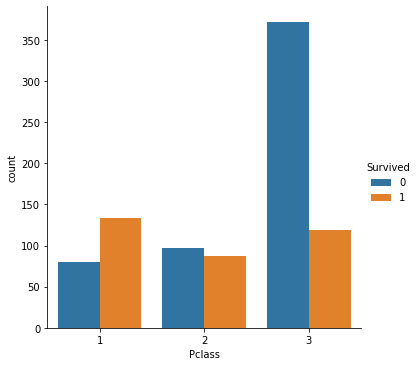

In [28]:
#countplot
sns.catplot(x="Pclass",hue="Survived",
kind="count",data=df)           

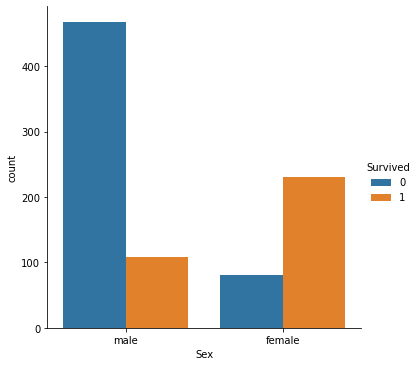

In [29]:
sns.catplot(x="Sex",hue="Survived",
kind="count",data=df)

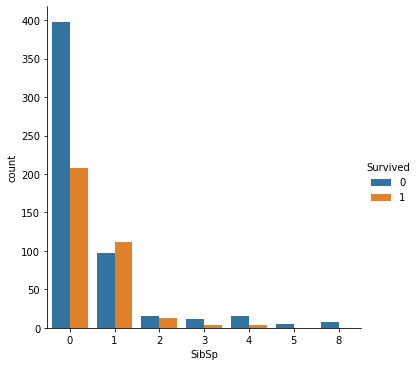

In [32]:
sns.catplot(x="SibSp",hue="Survived",
kind="count",data=df)

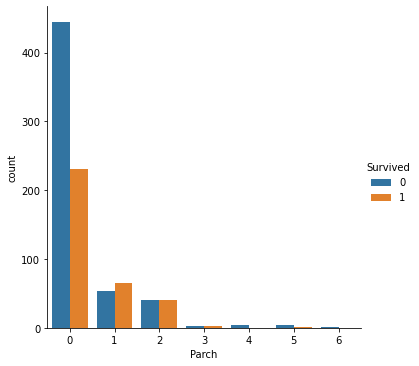

In [33]:
sns.catplot(x="Parch",hue="Survived",kind="count",data=df)

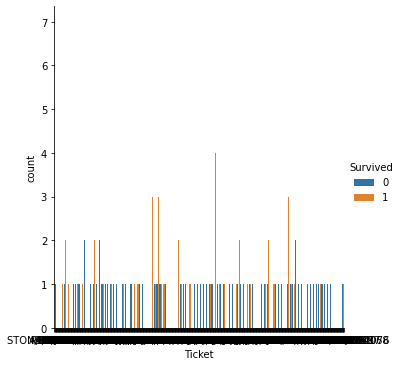

In [35]:
sns.catplot(x="Ticket",hue="Survived",kind="count",data=df)

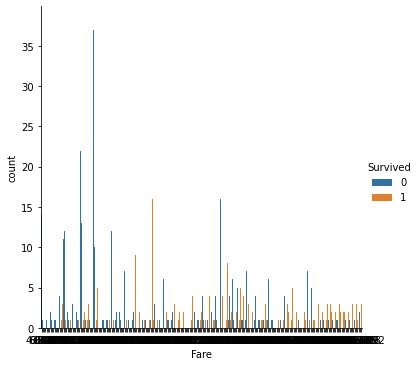

In [36]:
sns.catplot(x="Fare",hue="Survived",kind="count",data=df)

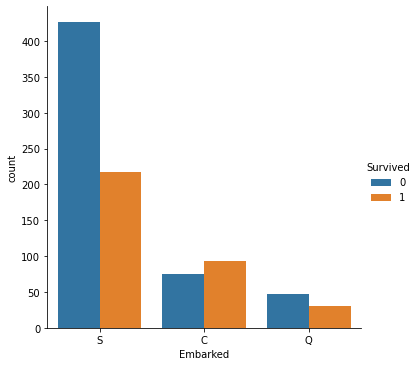

In [37]:
sns.catplot(x="Embarked",hue="Survived",kind="count",data=df)

In [38]:
df.drop("Ticket",axis=1,inplace=True)

In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat=['Sex','Embarked']
for i in cat:
    df[i]=le.fit_transform(df[i])

<AxesSubplot:>

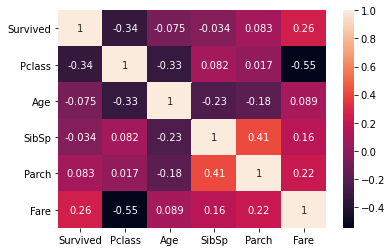

In [40]:
sns.heatmap(dfc,annot=True)

In [41]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [45]:
collist=df.columns.values
ncol=12
nrows=10

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

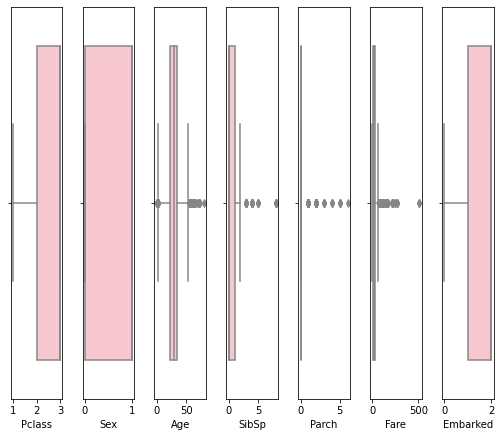

In [47]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='Pink',orient='v')
    plt.tight_layout()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

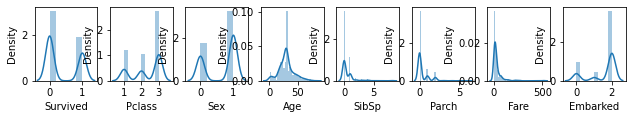

In [49]:
#checking the skewness of data
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

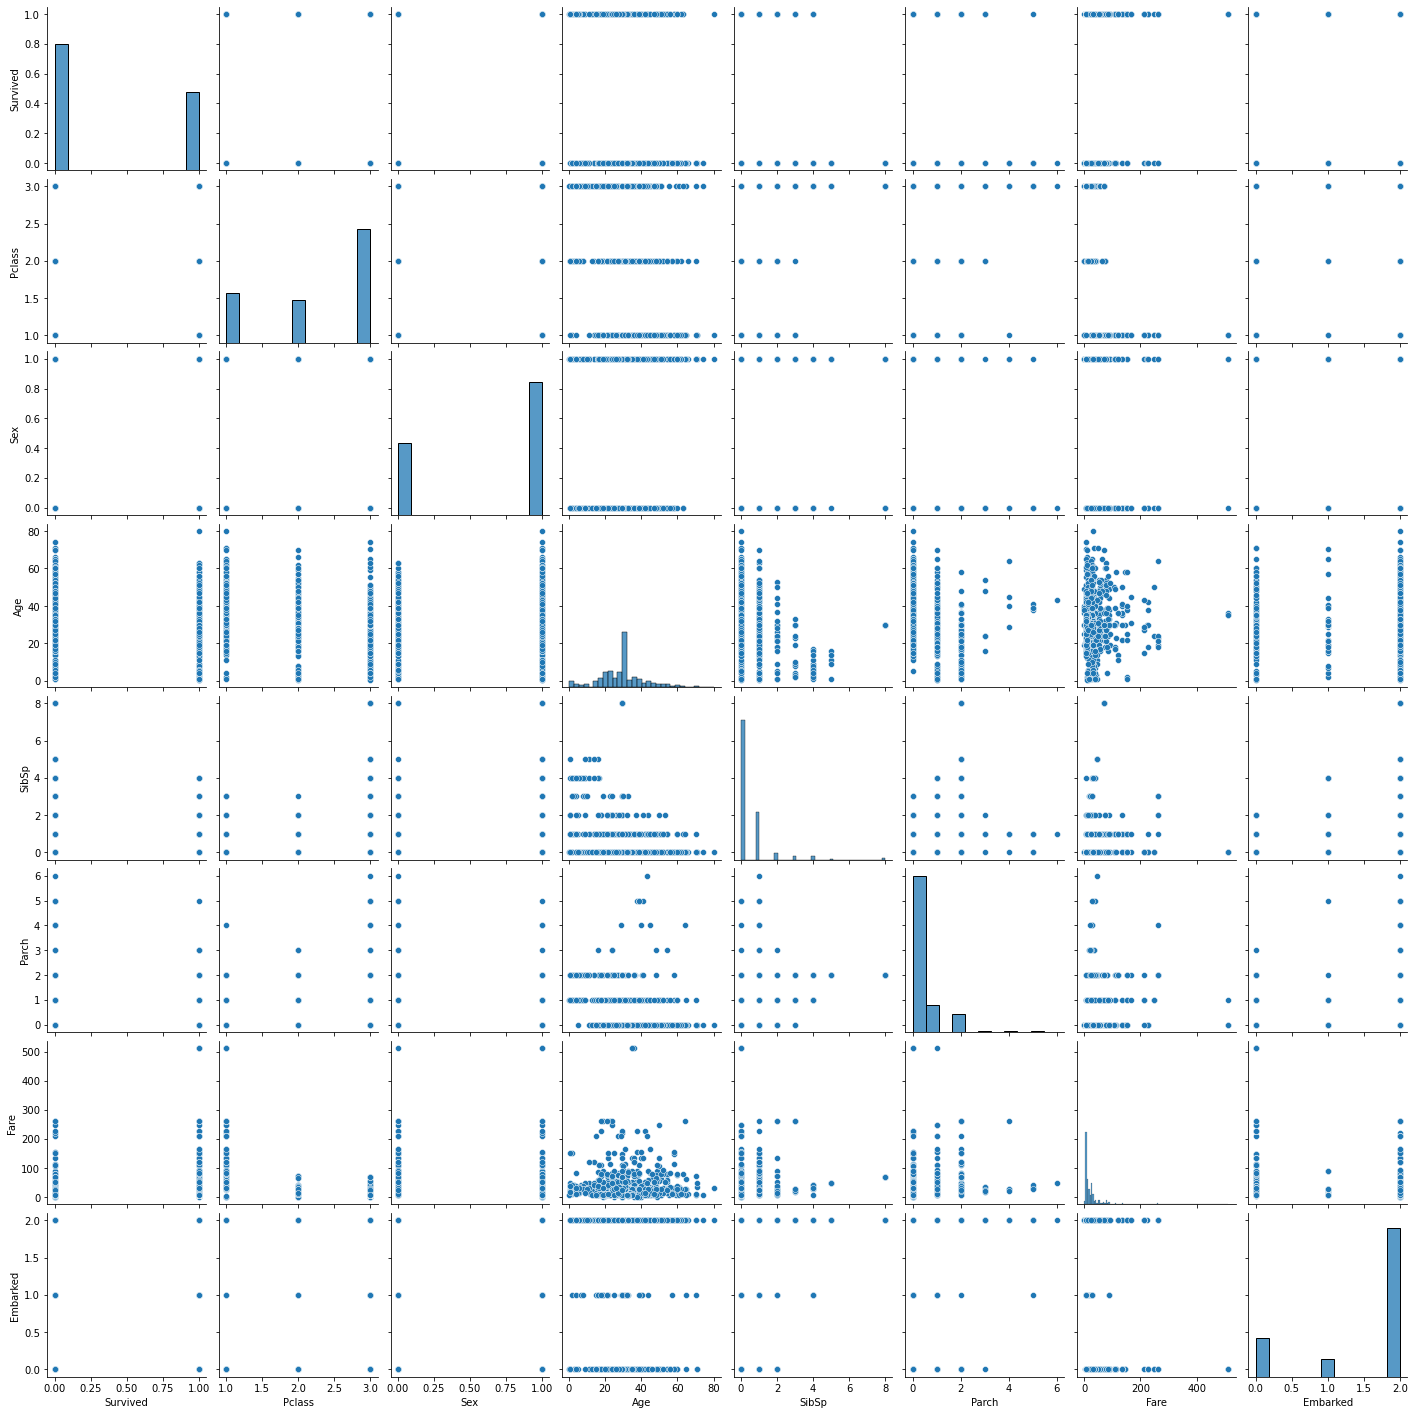

In [50]:
sns.pairplot(df)

In [52]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [53]:
df_final=df[(z<3).all(axis=1)]
df_final.shape

(818, 8)

In [54]:
df.shape

(889, 8)

In [55]:
#separating target and input variables
df_x=df_final.drop(columns=["Survived"])
y=df_final[["Survived"]]

In [56]:
#scaling the imput variable

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [57]:
from sklearn.metrics import accuracy_score

def max_accuracy_score(clf,x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=accuracy_score(y_test,y_pred)
        print("accuracyscore corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max accuracy score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [58]:
def kfold(clf,x,y,):
    print("Mean roc auccuracy score for",clf,cross_val_score(clf,x,y,cv=5,scoring="accuracy").mean())
    print("standard deviation inaccuracy_scoref or",clf,cross_val_score(clf,x,y,cv=5,scoring="accuracy").std())
    print(cross_val_score(clf,x,y,cv=5,scoring="accuracy"))

In [59]:
#lets use logistic regression
from sklearn.linear_model import LogisticRegression
lg_clsf=LogisticRegression()
max_accuracy_score(lg_clsf,x,y)

<IPython.core.display.Javascript object>

accuracyscore corresponding to  42  is  0.8292682926829268


<IPython.core.display.Javascript object>

accuracyscore corresponding to  43  is  0.7682926829268293


<IPython.core.display.Javascript object>

accuracyscore corresponding to  44  is  0.7987804878048781


<IPython.core.display.Javascript object>

accuracyscore corresponding to  45  is  0.7804878048780488


<IPython.core.display.Javascript object>

accuracyscore corresponding to  46  is  0.7926829268292683


<IPython.core.display.Javascript object>

accuracyscore corresponding to  47  is  0.7804878048780488


<IPython.core.display.Javascript object>

accuracyscore corresponding to  48  is  0.7865853658536586


<IPython.core.display.Javascript object>

accuracyscore corresponding to  49  is  0.7378048780487805


<IPython.core.display.Javascript object>

accuracyscore corresponding to  50  is  0.7926829268292683


<IPython.core.display.Javascript object>

accuracyscore corresponding to  51  is  0.823170731707317


<IPython.core.display.Javascript object>

accuracyscore corresponding to  52  is  0.7987804878048781


<IPython.core.display.Javascript object>

accuracyscore corresponding to  53  is  0.7378048780487805


<IPython.core.display.Javascript object>

accuracyscore corresponding to  54  is  0.7439024390243902


<IPython.core.display.Javascript object>

accuracyscore corresponding to  55  is  0.823170731707317


<IPython.core.display.Javascript object>

accuracyscore corresponding to  56  is  0.8170731707317073


<IPython.core.display.Javascript object>

accuracyscore corresponding to  57  is  0.8170731707317073


<IPython.core.display.Javascript object>

accuracyscore corresponding to  58  is  0.8475609756097561


<IPython.core.display.Javascript object>

accuracyscore corresponding to  59  is  0.7378048780487805


<IPython.core.display.Javascript object>

accuracyscore corresponding to  60  is  0.7865853658536586


<IPython.core.display.Javascript object>

accuracyscore corresponding to  61  is  0.8109756097560976


<IPython.core.display.Javascript object>

accuracyscore corresponding to  62  is  0.8658536585365854


<IPython.core.display.Javascript object>

accuracyscore corresponding to  63  is  0.8353658536585366


<IPython.core.display.Javascript object>

accuracyscore corresponding to  64  is  0.823170731707317


<IPython.core.display.Javascript object>

accuracyscore corresponding to  65  is  0.7926829268292683


<IPython.core.display.Javascript object>

accuracyscore corresponding to  66  is  0.774390243902439


<IPython.core.display.Javascript object>

accuracyscore corresponding to  67  is  0.823170731707317


<IPython.core.display.Javascript object>

accuracyscore corresponding to  68  is  0.7926829268292683


<IPython.core.display.Javascript object>

accuracyscore corresponding to  69  is  0.7560975609756098


<IPython.core.display.Javascript object>

accuracyscore corresponding to  70  is  0.7987804878048781


<IPython.core.display.Javascript object>

accuracyscore corresponding to  71  is  0.8292682926829268


<IPython.core.display.Javascript object>

accuracyscore corresponding to  72  is  0.8292682926829268


<IPython.core.display.Javascript object>

accuracyscore corresponding to  73  is  0.774390243902439


<IPython.core.display.Javascript object>

accuracyscore corresponding to  74  is  0.7987804878048781


<IPython.core.display.Javascript object>

accuracyscore corresponding to  75  is  0.7865853658536586


<IPython.core.display.Javascript object>

accuracyscore corresponding to  76  is  0.8170731707317073


<IPython.core.display.Javascript object>

accuracyscore corresponding to  77  is  0.7987804878048781


<IPython.core.display.Javascript object>

accuracyscore corresponding to  78  is  0.8048780487804879


<IPython.core.display.Javascript object>

accuracyscore corresponding to  79  is  0.7621951219512195


<IPython.core.display.Javascript object>

accuracyscore corresponding to  80  is  0.7926829268292683


<IPython.core.display.Javascript object>

accuracyscore corresponding to  81  is  0.7804878048780488


<IPython.core.display.Javascript object>

accuracyscore corresponding to  82  is  0.823170731707317


<IPython.core.display.Javascript object>

accuracyscore corresponding to  83  is  0.7682926829268293


<IPython.core.display.Javascript object>

accuracyscore corresponding to  84  is  0.823170731707317


<IPython.core.display.Javascript object>

accuracyscore corresponding to  85  is  0.7987804878048781


<IPython.core.display.Javascript object>

accuracyscore corresponding to  86  is  0.7804878048780488


<IPython.core.display.Javascript object>

accuracyscore corresponding to  87  is  0.8414634146341463


<IPython.core.display.Javascript object>

accuracyscore corresponding to  88  is  0.8048780487804879


<IPython.core.display.Javascript object>

accuracyscore corresponding to  89  is  0.7865853658536586


<IPython.core.display.Javascript object>

accuracyscore corresponding to  90  is  0.8048780487804879


<IPython.core.display.Javascript object>

accuracyscore corresponding to  91  is  0.7926829268292683


<IPython.core.display.Javascript object>

accuracyscore corresponding to  92  is  0.7987804878048781


<IPython.core.display.Javascript object>

accuracyscore corresponding to  93  is  0.7682926829268293


<IPython.core.display.Javascript object>

accuracyscore corresponding to  94  is  0.7865853658536586


<IPython.core.display.Javascript object>

accuracyscore corresponding to  95  is  0.8109756097560976


<IPython.core.display.Javascript object>

accuracyscore corresponding to  96  is  0.7926829268292683


<IPython.core.display.Javascript object>

accuracyscore corresponding to  97  is  0.8170731707317073


<IPython.core.display.Javascript object>

accuracyscore corresponding to  98  is  0.8048780487804879


<IPython.core.display.Javascript object>

accuracyscore corresponding to  99  is  0.774390243902439
max accuracy score corresponding to  62  is  0.8658536585365854


62

In [60]:
kfold(lg_clsf,x,y)

<IPython.core.display.Javascript object>

Mean roc auccuracy score for LogisticRegression() 0.7885380816998355


<IPython.core.display.Javascript object>

standard deviation inaccuracy_scoref or LogisticRegression() 0.012081249896435352


<IPython.core.display.Javascript object>

[0.78658537 0.77439024 0.7804878  0.79141104 0.80981595]


In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,50)}
clf = GridSearchCV(kc, neighbors, cv=5,scoring="f1")
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 13}

In [62]:
knn=KNeighborsClassifier(n_neighbors=13)
max_accuracy_score(knn,x,y)

<IPython.core.display.Javascript object>

accuracyscore corresponding to  42  is  0.8536585365853658


<IPython.core.display.Javascript object>

accuracyscore corresponding to  43  is  0.7865853658536586


<IPython.core.display.Javascript object>

accuracyscore corresponding to  44  is  0.8109756097560976


<IPython.core.display.Javascript object>

accuracyscore corresponding to  45  is  0.7926829268292683


<IPython.core.display.Javascript object>

accuracyscore corresponding to  46  is  0.7987804878048781


<IPython.core.display.Javascript object>

accuracyscore corresponding to  47  is  0.8292682926829268


<IPython.core.display.Javascript object>

accuracyscore corresponding to  48  is  0.8353658536585366


<IPython.core.display.Javascript object>

accuracyscore corresponding to  49  is  0.7621951219512195


<IPython.core.display.Javascript object>

accuracyscore corresponding to  50  is  0.7987804878048781


<IPython.core.display.Javascript object>

accuracyscore corresponding to  51  is  0.8414634146341463


<IPython.core.display.Javascript object>

accuracyscore corresponding to  52  is  0.8109756097560976


<IPython.core.display.Javascript object>

accuracyscore corresponding to  53  is  0.774390243902439


<IPython.core.display.Javascript object>

accuracyscore corresponding to  54  is  0.7926829268292683


<IPython.core.display.Javascript object>

accuracyscore corresponding to  55  is  0.8170731707317073


<IPython.core.display.Javascript object>

accuracyscore corresponding to  56  is  0.823170731707317


<IPython.core.display.Javascript object>

accuracyscore corresponding to  57  is  0.8170731707317073


<IPython.core.display.Javascript object>

accuracyscore corresponding to  58  is  0.8109756097560976


<IPython.core.display.Javascript object>

accuracyscore corresponding to  59  is  0.7439024390243902


<IPython.core.display.Javascript object>

accuracyscore corresponding to  60  is  0.8170731707317073


<IPython.core.display.Javascript object>

accuracyscore corresponding to  61  is  0.7987804878048781


<IPython.core.display.Javascript object>

accuracyscore corresponding to  62  is  0.823170731707317


<IPython.core.display.Javascript object>

accuracyscore corresponding to  63  is  0.8353658536585366


<IPython.core.display.Javascript object>

accuracyscore corresponding to  64  is  0.8780487804878049


<IPython.core.display.Javascript object>

accuracyscore corresponding to  65  is  0.7621951219512195


<IPython.core.display.Javascript object>

accuracyscore corresponding to  66  is  0.8048780487804879


<IPython.core.display.Javascript object>

accuracyscore corresponding to  67  is  0.7865853658536586


<IPython.core.display.Javascript object>

accuracyscore corresponding to  68  is  0.7560975609756098


<IPython.core.display.Javascript object>

accuracyscore corresponding to  69  is  0.7865853658536586


<IPython.core.display.Javascript object>

accuracyscore corresponding to  70  is  0.823170731707317


<IPython.core.display.Javascript object>

accuracyscore corresponding to  71  is  0.774390243902439


<IPython.core.display.Javascript object>

accuracyscore corresponding to  72  is  0.8536585365853658


<IPython.core.display.Javascript object>

accuracyscore corresponding to  73  is  0.7804878048780488


<IPython.core.display.Javascript object>

accuracyscore corresponding to  74  is  0.774390243902439


<IPython.core.display.Javascript object>

accuracyscore corresponding to  75  is  0.8536585365853658


<IPython.core.display.Javascript object>

accuracyscore corresponding to  76  is  0.823170731707317


<IPython.core.display.Javascript object>

accuracyscore corresponding to  77  is  0.774390243902439


<IPython.core.display.Javascript object>

accuracyscore corresponding to  78  is  0.7987804878048781


<IPython.core.display.Javascript object>

accuracyscore corresponding to  79  is  0.7926829268292683


<IPython.core.display.Javascript object>

accuracyscore corresponding to  80  is  0.8109756097560976


<IPython.core.display.Javascript object>

accuracyscore corresponding to  81  is  0.774390243902439


<IPython.core.display.Javascript object>

accuracyscore corresponding to  82  is  0.8536585365853658


<IPython.core.display.Javascript object>

accuracyscore corresponding to  83  is  0.7682926829268293


<IPython.core.display.Javascript object>

accuracyscore corresponding to  84  is  0.823170731707317


<IPython.core.display.Javascript object>

accuracyscore corresponding to  85  is  0.8170731707317073


<IPython.core.display.Javascript object>

accuracyscore corresponding to  86  is  0.7865853658536586


<IPython.core.display.Javascript object>

accuracyscore corresponding to  87  is  0.7987804878048781


<IPython.core.display.Javascript object>

accuracyscore corresponding to  88  is  0.8170731707317073


<IPython.core.display.Javascript object>

accuracyscore corresponding to  89  is  0.7987804878048781


<IPython.core.display.Javascript object>

accuracyscore corresponding to  90  is  0.8353658536585366


<IPython.core.display.Javascript object>

accuracyscore corresponding to  91  is  0.7865853658536586


<IPython.core.display.Javascript object>

accuracyscore corresponding to  92  is  0.8048780487804879


<IPython.core.display.Javascript object>

accuracyscore corresponding to  93  is  0.7987804878048781


<IPython.core.display.Javascript object>

accuracyscore corresponding to  94  is  0.75


<IPython.core.display.Javascript object>

accuracyscore corresponding to  95  is  0.8353658536585366


<IPython.core.display.Javascript object>

accuracyscore corresponding to  96  is  0.823170731707317


<IPython.core.display.Javascript object>

accuracyscore corresponding to  97  is  0.8597560975609756


<IPython.core.display.Javascript object>

accuracyscore corresponding to  98  is  0.8109756097560976


<IPython.core.display.Javascript object>

accuracyscore corresponding to  99  is  0.8109756097560976
max accuracy score corresponding to  64  is  0.8780487804878049


64

In [63]:
kfold(knn,x,y)

<IPython.core.display.Javascript object>

Mean roc auccuracy score for KNeighborsClassifier(n_neighbors=13) 0.8092997156965435


<IPython.core.display.Javascript object>

standard deviation inaccuracy_scoref or KNeighborsClassifier(n_neighbors=13) 0.011688715164520625


<IPython.core.display.Javascript object>

[0.79268293 0.80487805 0.82317073 0.80368098 0.82208589]


In [64]:
parameters={"n_estimators":[10,50,100,150,200,250,300,350,400,450,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=5,scoring="f1")
clf.fit(x,y)
clf.best_params_

<IPython.core.display.Javascript object>

{'n_estimators': 100}

In [65]:
rf_clf=RandomForestClassifier(n_estimators=50)
max_accuracy_score(rf_clf,x,y)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

accuracyscore corresponding to  42  is  0.8292682926829268


<IPython.core.display.Javascript object>

accuracyscore corresponding to  43  is  0.7378048780487805


<IPython.core.display.Javascript object>

accuracyscore corresponding to  44  is  0.823170731707317


<IPython.core.display.Javascript object>

accuracyscore corresponding to  45  is  0.8292682926829268


<IPython.core.display.Javascript object>

accuracyscore corresponding to  46  is  0.7682926829268293


<IPython.core.display.Javascript object>

accuracyscore corresponding to  47  is  0.7804878048780488


<IPython.core.display.Javascript object>

accuracyscore corresponding to  48  is  0.7987804878048781


<IPython.core.display.Javascript object>

accuracyscore corresponding to  49  is  0.7865853658536586


<IPython.core.display.Javascript object>

accuracyscore corresponding to  50  is  0.7865853658536586


<IPython.core.display.Javascript object>

accuracyscore corresponding to  51  is  0.8292682926829268


<IPython.core.display.Javascript object>

accuracyscore corresponding to  52  is  0.7987804878048781


<IPython.core.display.Javascript object>

accuracyscore corresponding to  53  is  0.75


<IPython.core.display.Javascript object>

accuracyscore corresponding to  54  is  0.774390243902439


<IPython.core.display.Javascript object>

accuracyscore corresponding to  55  is  0.823170731707317


<IPython.core.display.Javascript object>

accuracyscore corresponding to  56  is  0.8048780487804879


<IPython.core.display.Javascript object>

accuracyscore corresponding to  57  is  0.823170731707317


<IPython.core.display.Javascript object>

accuracyscore corresponding to  58  is  0.8109756097560976


<IPython.core.display.Javascript object>

accuracyscore corresponding to  59  is  0.7804878048780488


<IPython.core.display.Javascript object>

accuracyscore corresponding to  60  is  0.8109756097560976


<IPython.core.display.Javascript object>

accuracyscore corresponding to  61  is  0.8353658536585366


<IPython.core.display.Javascript object>

accuracyscore corresponding to  62  is  0.8292682926829268


<IPython.core.display.Javascript object>

accuracyscore corresponding to  63  is  0.823170731707317


<IPython.core.display.Javascript object>

accuracyscore corresponding to  64  is  0.8414634146341463


<IPython.core.display.Javascript object>

accuracyscore corresponding to  65  is  0.7926829268292683


<IPython.core.display.Javascript object>

accuracyscore corresponding to  66  is  0.7804878048780488


<IPython.core.display.Javascript object>

accuracyscore corresponding to  67  is  0.8048780487804879


<IPython.core.display.Javascript object>

accuracyscore corresponding to  68  is  0.774390243902439


<IPython.core.display.Javascript object>

accuracyscore corresponding to  69  is  0.774390243902439


<IPython.core.display.Javascript object>

accuracyscore corresponding to  70  is  0.8292682926829268


<IPython.core.display.Javascript object>

accuracyscore corresponding to  71  is  0.8109756097560976


<IPython.core.display.Javascript object>

accuracyscore corresponding to  72  is  0.7987804878048781


<IPython.core.display.Javascript object>

accuracyscore corresponding to  73  is  0.7621951219512195


<IPython.core.display.Javascript object>

accuracyscore corresponding to  74  is  0.8292682926829268


<IPython.core.display.Javascript object>

accuracyscore corresponding to  75  is  0.8414634146341463


<IPython.core.display.Javascript object>

accuracyscore corresponding to  76  is  0.7926829268292683


<IPython.core.display.Javascript object>

accuracyscore corresponding to  77  is  0.7621951219512195


<IPython.core.display.Javascript object>

accuracyscore corresponding to  78  is  0.7987804878048781


<IPython.core.display.Javascript object>

accuracyscore corresponding to  79  is  0.7865853658536586


<IPython.core.display.Javascript object>

accuracyscore corresponding to  80  is  0.774390243902439


<IPython.core.display.Javascript object>

accuracyscore corresponding to  81  is  0.7865853658536586


<IPython.core.display.Javascript object>

accuracyscore corresponding to  82  is  0.8292682926829268


<IPython.core.display.Javascript object>

accuracyscore corresponding to  83  is  0.7865853658536586


<IPython.core.display.Javascript object>

accuracyscore corresponding to  84  is  0.823170731707317


<IPython.core.display.Javascript object>

accuracyscore corresponding to  85  is  0.7865853658536586


<IPython.core.display.Javascript object>

accuracyscore corresponding to  86  is  0.8048780487804879


<IPython.core.display.Javascript object>

accuracyscore corresponding to  87  is  0.8414634146341463


<IPython.core.display.Javascript object>

accuracyscore corresponding to  88  is  0.8719512195121951


<IPython.core.display.Javascript object>

accuracyscore corresponding to  89  is  0.823170731707317


<IPython.core.display.Javascript object>

accuracyscore corresponding to  90  is  0.8353658536585366


<IPython.core.display.Javascript object>

accuracyscore corresponding to  91  is  0.823170731707317


<IPython.core.display.Javascript object>

accuracyscore corresponding to  92  is  0.7865853658536586


<IPython.core.display.Javascript object>

accuracyscore corresponding to  93  is  0.7621951219512195


<IPython.core.display.Javascript object>

accuracyscore corresponding to  94  is  0.7926829268292683


<IPython.core.display.Javascript object>

accuracyscore corresponding to  95  is  0.7987804878048781


<IPython.core.display.Javascript object>

accuracyscore corresponding to  96  is  0.7926829268292683


<IPython.core.display.Javascript object>

accuracyscore corresponding to  97  is  0.8353658536585366


<IPython.core.display.Javascript object>

accuracyscore corresponding to  98  is  0.8048780487804879


<IPython.core.display.Javascript object>

accuracyscore corresponding to  99  is  0.8170731707317073
max accuracy score corresponding to  88  is  0.8719512195121951


88

In [66]:
kfold(rf_clf,x,y)

<IPython.core.display.Javascript object>

Mean roc auccuracy score for RandomForestClassifier(n_estimators=50) 0.7958252281909323


<IPython.core.display.Javascript object>

standard deviation inaccuracy_scoref or RandomForestClassifier(n_estimators=50) 0.01881082269561061


<IPython.core.display.Javascript object>

[0.80487805 0.81707317 0.84756098 0.7791411  0.80981595]


In [67]:
#Lets use SVM
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="f1")
clf.fit(x,y)
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [68]:
svc=SVC(kernel="rbf",C=1)
max_accuracy_score(svc,x,y)

<IPython.core.display.Javascript object>

accuracyscore corresponding to  42  is  0.8414634146341463


<IPython.core.display.Javascript object>

accuracyscore corresponding to  43  is  0.774390243902439


<IPython.core.display.Javascript object>

accuracyscore corresponding to  44  is  0.8170731707317073


<IPython.core.display.Javascript object>

accuracyscore corresponding to  45  is  0.8109756097560976


<IPython.core.display.Javascript object>

accuracyscore corresponding to  46  is  0.823170731707317


<IPython.core.display.Javascript object>

accuracyscore corresponding to  47  is  0.8292682926829268


<IPython.core.display.Javascript object>

accuracyscore corresponding to  48  is  0.8170731707317073


<IPython.core.display.Javascript object>

accuracyscore corresponding to  49  is  0.7378048780487805


<IPython.core.display.Javascript object>

accuracyscore corresponding to  50  is  0.8109756097560976


<IPython.core.display.Javascript object>

accuracyscore corresponding to  51  is  0.8292682926829268


<IPython.core.display.Javascript object>

accuracyscore corresponding to  52  is  0.8170731707317073


<IPython.core.display.Javascript object>

accuracyscore corresponding to  53  is  0.774390243902439


<IPython.core.display.Javascript object>

accuracyscore corresponding to  54  is  0.7926829268292683


<IPython.core.display.Javascript object>

accuracyscore corresponding to  55  is  0.8658536585365854


<IPython.core.display.Javascript object>

accuracyscore corresponding to  56  is  0.823170731707317


<IPython.core.display.Javascript object>

accuracyscore corresponding to  57  is  0.8292682926829268


<IPython.core.display.Javascript object>

accuracyscore corresponding to  58  is  0.8353658536585366


<IPython.core.display.Javascript object>

accuracyscore corresponding to  59  is  0.7682926829268293


<IPython.core.display.Javascript object>

accuracyscore corresponding to  60  is  0.8109756097560976


<IPython.core.display.Javascript object>

accuracyscore corresponding to  61  is  0.8292682926829268


<IPython.core.display.Javascript object>

accuracyscore corresponding to  62  is  0.8292682926829268


<IPython.core.display.Javascript object>

accuracyscore corresponding to  63  is  0.8536585365853658


<IPython.core.display.Javascript object>

accuracyscore corresponding to  64  is  0.8536585365853658


<IPython.core.display.Javascript object>

accuracyscore corresponding to  65  is  0.7865853658536586


<IPython.core.display.Javascript object>

accuracyscore corresponding to  66  is  0.7926829268292683


<IPython.core.display.Javascript object>

accuracyscore corresponding to  67  is  0.8109756097560976


<IPython.core.display.Javascript object>

accuracyscore corresponding to  68  is  0.7621951219512195


<IPython.core.display.Javascript object>

accuracyscore corresponding to  69  is  0.8109756097560976


<IPython.core.display.Javascript object>

accuracyscore corresponding to  70  is  0.8414634146341463


<IPython.core.display.Javascript object>

accuracyscore corresponding to  71  is  0.8048780487804879


<IPython.core.display.Javascript object>

accuracyscore corresponding to  72  is  0.8475609756097561


<IPython.core.display.Javascript object>

accuracyscore corresponding to  73  is  0.7926829268292683


<IPython.core.display.Javascript object>

accuracyscore corresponding to  74  is  0.7987804878048781


<IPython.core.display.Javascript object>

accuracyscore corresponding to  75  is  0.8414634146341463


<IPython.core.display.Javascript object>

accuracyscore corresponding to  76  is  0.823170731707317


<IPython.core.display.Javascript object>

accuracyscore corresponding to  77  is  0.7926829268292683


<IPython.core.display.Javascript object>

accuracyscore corresponding to  78  is  0.8170731707317073


<IPython.core.display.Javascript object>

accuracyscore corresponding to  79  is  0.7926829268292683


<IPython.core.display.Javascript object>

accuracyscore corresponding to  80  is  0.7987804878048781


<IPython.core.display.Javascript object>

accuracyscore corresponding to  81  is  0.7804878048780488


<IPython.core.display.Javascript object>

accuracyscore corresponding to  82  is  0.8292682926829268


<IPython.core.display.Javascript object>

accuracyscore corresponding to  83  is  0.774390243902439


<IPython.core.display.Javascript object>

accuracyscore corresponding to  84  is  0.8048780487804879


<IPython.core.display.Javascript object>

accuracyscore corresponding to  85  is  0.8109756097560976


<IPython.core.display.Javascript object>

accuracyscore corresponding to  86  is  0.7987804878048781


<IPython.core.display.Javascript object>

accuracyscore corresponding to  87  is  0.8719512195121951


<IPython.core.display.Javascript object>

accuracyscore corresponding to  88  is  0.8353658536585366


<IPython.core.display.Javascript object>

accuracyscore corresponding to  89  is  0.8109756097560976


<IPython.core.display.Javascript object>

accuracyscore corresponding to  90  is  0.8292682926829268


<IPython.core.display.Javascript object>

accuracyscore corresponding to  91  is  0.8109756097560976


<IPython.core.display.Javascript object>

accuracyscore corresponding to  92  is  0.8292682926829268


<IPython.core.display.Javascript object>

accuracyscore corresponding to  93  is  0.8048780487804879


<IPython.core.display.Javascript object>

accuracyscore corresponding to  94  is  0.7926829268292683


<IPython.core.display.Javascript object>

accuracyscore corresponding to  95  is  0.823170731707317


<IPython.core.display.Javascript object>

accuracyscore corresponding to  96  is  0.8414634146341463


<IPython.core.display.Javascript object>

accuracyscore corresponding to  97  is  0.823170731707317


<IPython.core.display.Javascript object>

accuracyscore corresponding to  98  is  0.8109756097560976


<IPython.core.display.Javascript object>

accuracyscore corresponding to  99  is  0.8048780487804879
max accuracy score corresponding to  87  is  0.8719512195121951


87

In [69]:
#lets again use cross val score
kfold(svc,x,y)

<IPython.core.display.Javascript object>

Mean roc auccuracy score for SVC(C=1) 0.8154197216818794


<IPython.core.display.Javascript object>

standard deviation inaccuracy_scoref or SVC(C=1) 0.018933006905244264


<IPython.core.display.Javascript object>

[0.83536585 0.79268293 0.80487805 0.80368098 0.8404908 ]


In [70]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
gbr=GradientBoostingClassifier()


parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[5,50,100,150,200,250,300,350,400,450,500,550,600]}
clf = GridSearchCV(gbr, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 250}

In [71]:
gbr=GradientBoostingClassifier(learning_rate=0.1,n_estimators=30)
max_accuracy_score(gbr,x,y)

<IPython.core.display.Javascript object>

accuracyscore corresponding to  42  is  0.8353658536585366


<IPython.core.display.Javascript object>

accuracyscore corresponding to  43  is  0.7987804878048781


<IPython.core.display.Javascript object>

accuracyscore corresponding to  44  is  0.8292682926829268


<IPython.core.display.Javascript object>

accuracyscore corresponding to  45  is  0.7804878048780488


<IPython.core.display.Javascript object>

accuracyscore corresponding to  46  is  0.8414634146341463


<IPython.core.display.Javascript object>

accuracyscore corresponding to  47  is  0.8109756097560976


<IPython.core.display.Javascript object>

accuracyscore corresponding to  48  is  0.7926829268292683


<IPython.core.display.Javascript object>

accuracyscore corresponding to  49  is  0.7621951219512195


<IPython.core.display.Javascript object>

accuracyscore corresponding to  50  is  0.8048780487804879


<IPython.core.display.Javascript object>

accuracyscore corresponding to  51  is  0.8170731707317073


<IPython.core.display.Javascript object>

accuracyscore corresponding to  52  is  0.8109756097560976


<IPython.core.display.Javascript object>

accuracyscore corresponding to  53  is  0.7560975609756098


<IPython.core.display.Javascript object>

accuracyscore corresponding to  54  is  0.7865853658536586


<IPython.core.display.Javascript object>

accuracyscore corresponding to  55  is  0.8475609756097561


<IPython.core.display.Javascript object>

accuracyscore corresponding to  56  is  0.8353658536585366


<IPython.core.display.Javascript object>

accuracyscore corresponding to  57  is  0.8170731707317073


<IPython.core.display.Javascript object>

accuracyscore corresponding to  58  is  0.8353658536585366


<IPython.core.display.Javascript object>

accuracyscore corresponding to  59  is  0.7682926829268293


<IPython.core.display.Javascript object>

accuracyscore corresponding to  60  is  0.823170731707317


<IPython.core.display.Javascript object>

accuracyscore corresponding to  61  is  0.823170731707317


<IPython.core.display.Javascript object>

accuracyscore corresponding to  62  is  0.8353658536585366


<IPython.core.display.Javascript object>

accuracyscore corresponding to  63  is  0.8658536585365854


<IPython.core.display.Javascript object>

accuracyscore corresponding to  64  is  0.8414634146341463


<IPython.core.display.Javascript object>

accuracyscore corresponding to  65  is  0.7987804878048781


<IPython.core.display.Javascript object>

accuracyscore corresponding to  66  is  0.8170731707317073


<IPython.core.display.Javascript object>

accuracyscore corresponding to  67  is  0.8597560975609756


<IPython.core.display.Javascript object>

accuracyscore corresponding to  68  is  0.7682926829268293


<IPython.core.display.Javascript object>

accuracyscore corresponding to  69  is  0.7987804878048781


<IPython.core.display.Javascript object>

accuracyscore corresponding to  70  is  0.8292682926829268


<IPython.core.display.Javascript object>

accuracyscore corresponding to  71  is  0.823170731707317


<IPython.core.display.Javascript object>

accuracyscore corresponding to  72  is  0.8292682926829268


<IPython.core.display.Javascript object>

accuracyscore corresponding to  73  is  0.7865853658536586


<IPython.core.display.Javascript object>

accuracyscore corresponding to  74  is  0.7804878048780488


<IPython.core.display.Javascript object>

accuracyscore corresponding to  75  is  0.8597560975609756


<IPython.core.display.Javascript object>

accuracyscore corresponding to  76  is  0.8353658536585366


<IPython.core.display.Javascript object>

accuracyscore corresponding to  77  is  0.7804878048780488


<IPython.core.display.Javascript object>

accuracyscore corresponding to  78  is  0.823170731707317


<IPython.core.display.Javascript object>

accuracyscore corresponding to  79  is  0.7865853658536586


<IPython.core.display.Javascript object>

accuracyscore corresponding to  80  is  0.7865853658536586


<IPython.core.display.Javascript object>

accuracyscore corresponding to  81  is  0.7926829268292683


<IPython.core.display.Javascript object>

accuracyscore corresponding to  82  is  0.8353658536585366


<IPython.core.display.Javascript object>

accuracyscore corresponding to  83  is  0.7682926829268293


<IPython.core.display.Javascript object>

accuracyscore corresponding to  84  is  0.8170731707317073


<IPython.core.display.Javascript object>

accuracyscore corresponding to  85  is  0.8170731707317073


<IPython.core.display.Javascript object>

accuracyscore corresponding to  86  is  0.823170731707317


<IPython.core.display.Javascript object>

accuracyscore corresponding to  87  is  0.8414634146341463


<IPython.core.display.Javascript object>

accuracyscore corresponding to  88  is  0.8292682926829268


<IPython.core.display.Javascript object>

accuracyscore corresponding to  89  is  0.8048780487804879


<IPython.core.display.Javascript object>

accuracyscore corresponding to  90  is  0.823170731707317


<IPython.core.display.Javascript object>

accuracyscore corresponding to  91  is  0.8170731707317073


<IPython.core.display.Javascript object>

accuracyscore corresponding to  92  is  0.823170731707317


<IPython.core.display.Javascript object>

accuracyscore corresponding to  93  is  0.7926829268292683


<IPython.core.display.Javascript object>

accuracyscore corresponding to  94  is  0.7987804878048781


<IPython.core.display.Javascript object>

accuracyscore corresponding to  95  is  0.8292682926829268


<IPython.core.display.Javascript object>

accuracyscore corresponding to  96  is  0.823170731707317


<IPython.core.display.Javascript object>

accuracyscore corresponding to  97  is  0.8475609756097561


<IPython.core.display.Javascript object>

accuracyscore corresponding to  98  is  0.8048780487804879


<IPython.core.display.Javascript object>

accuracyscore corresponding to  99  is  0.7926829268292683
max accuracy score corresponding to  63  is  0.8658536585365854


63

In [72]:
kfold(gbr,x,y)

<IPython.core.display.Javascript object>

Mean roc auccuracy score for GradientBoostingClassifier(n_estimators=30) 0.8007406853209635


<IPython.core.display.Javascript object>

standard deviation inaccuracy_scoref or GradientBoostingClassifier(n_estimators=30) 0.0182919959466925


<IPython.core.display.Javascript object>

[0.77439024 0.80487805 0.81707317 0.78527607 0.82208589]


In [73]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_clsf=AdaBoostClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],"base_estimator":[ DecisionTreeClassifier()]}
clf = GridSearchCV(ada_clsf, parameters, cv=5)
clf.fit(df_x,y)
clf.best_params_

{'base_estimator': DecisionTreeClassifier(),
 'learning_rate': 1,
 'n_estimators': 500}

In [74]:
ada_clf=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),learning_rate=1,n_estimators=500)
max_accuracy_score(ada_clf,x,y)

<IPython.core.display.Javascript object>

accuracyscore corresponding to  42  is  0.8353658536585366


<IPython.core.display.Javascript object>

accuracyscore corresponding to  43  is  0.7317073170731707


<IPython.core.display.Javascript object>

accuracyscore corresponding to  44  is  0.7560975609756098


<IPython.core.display.Javascript object>

accuracyscore corresponding to  45  is  0.7682926829268293


<IPython.core.display.Javascript object>

accuracyscore corresponding to  46  is  0.7682926829268293


<IPython.core.display.Javascript object>

accuracyscore corresponding to  47  is  0.774390243902439


<IPython.core.display.Javascript object>

accuracyscore corresponding to  48  is  0.774390243902439


<IPython.core.display.Javascript object>

accuracyscore corresponding to  49  is  0.7804878048780488


<IPython.core.display.Javascript object>

accuracyscore corresponding to  50  is  0.7317073170731707


<IPython.core.display.Javascript object>

accuracyscore corresponding to  51  is  0.823170731707317


<IPython.core.display.Javascript object>

accuracyscore corresponding to  52  is  0.7865853658536586


<IPython.core.display.Javascript object>

accuracyscore corresponding to  53  is  0.7317073170731707


<IPython.core.display.Javascript object>

accuracyscore corresponding to  54  is  0.7439024390243902


<IPython.core.display.Javascript object>

accuracyscore corresponding to  55  is  0.7804878048780488


<IPython.core.display.Javascript object>

accuracyscore corresponding to  56  is  0.823170731707317


<IPython.core.display.Javascript object>

accuracyscore corresponding to  57  is  0.7926829268292683


<IPython.core.display.Javascript object>

accuracyscore corresponding to  58  is  0.8109756097560976


<IPython.core.display.Javascript object>

accuracyscore corresponding to  59  is  0.7621951219512195


<IPython.core.display.Javascript object>

accuracyscore corresponding to  60  is  0.8353658536585366


<IPython.core.display.Javascript object>

accuracyscore corresponding to  61  is  0.8109756097560976


<IPython.core.display.Javascript object>

accuracyscore corresponding to  62  is  0.7865853658536586


<IPython.core.display.Javascript object>

accuracyscore corresponding to  63  is  0.7621951219512195


<IPython.core.display.Javascript object>

accuracyscore corresponding to  64  is  0.8109756097560976


<IPython.core.display.Javascript object>

accuracyscore corresponding to  65  is  0.7682926829268293


<IPython.core.display.Javascript object>

accuracyscore corresponding to  66  is  0.7804878048780488


<IPython.core.display.Javascript object>

accuracyscore corresponding to  67  is  0.7378048780487805


<IPython.core.display.Javascript object>

accuracyscore corresponding to  68  is  0.7134146341463414


<IPython.core.display.Javascript object>

accuracyscore corresponding to  69  is  0.7804878048780488


<IPython.core.display.Javascript object>

accuracyscore corresponding to  70  is  0.8048780487804879


<IPython.core.display.Javascript object>

accuracyscore corresponding to  71  is  0.7926829268292683


<IPython.core.display.Javascript object>

accuracyscore corresponding to  72  is  0.7621951219512195


<IPython.core.display.Javascript object>

accuracyscore corresponding to  73  is  0.7439024390243902


<IPython.core.display.Javascript object>

accuracyscore corresponding to  74  is  0.8292682926829268


<IPython.core.display.Javascript object>

accuracyscore corresponding to  75  is  0.8353658536585366


<IPython.core.display.Javascript object>

accuracyscore corresponding to  76  is  0.7987804878048781


<IPython.core.display.Javascript object>

accuracyscore corresponding to  77  is  0.7378048780487805


<IPython.core.display.Javascript object>

accuracyscore corresponding to  78  is  0.7560975609756098


<IPython.core.display.Javascript object>

accuracyscore corresponding to  79  is  0.7378048780487805


<IPython.core.display.Javascript object>

accuracyscore corresponding to  80  is  0.7439024390243902


<IPython.core.display.Javascript object>

accuracyscore corresponding to  81  is  0.774390243902439


<IPython.core.display.Javascript object>

accuracyscore corresponding to  82  is  0.8170731707317073


<IPython.core.display.Javascript object>

accuracyscore corresponding to  83  is  0.7439024390243902


<IPython.core.display.Javascript object>

accuracyscore corresponding to  84  is  0.7987804878048781


<IPython.core.display.Javascript object>

accuracyscore corresponding to  85  is  0.7682926829268293


<IPython.core.display.Javascript object>

accuracyscore corresponding to  86  is  0.8109756097560976


<IPython.core.display.Javascript object>

accuracyscore corresponding to  87  is  0.8109756097560976


<IPython.core.display.Javascript object>

accuracyscore corresponding to  88  is  0.823170731707317


<IPython.core.display.Javascript object>

accuracyscore corresponding to  89  is  0.7987804878048781


<IPython.core.display.Javascript object>

accuracyscore corresponding to  90  is  0.823170731707317


<IPython.core.display.Javascript object>

accuracyscore corresponding to  91  is  0.8170731707317073


<IPython.core.display.Javascript object>

accuracyscore corresponding to  92  is  0.7987804878048781


<IPython.core.display.Javascript object>

accuracyscore corresponding to  93  is  0.7560975609756098


<IPython.core.display.Javascript object>

accuracyscore corresponding to  94  is  0.7682926829268293


<IPython.core.display.Javascript object>

accuracyscore corresponding to  95  is  0.823170731707317


<IPython.core.display.Javascript object>

accuracyscore corresponding to  96  is  0.8170731707317073


<IPython.core.display.Javascript object>

accuracyscore corresponding to  97  is  0.8170731707317073


<IPython.core.display.Javascript object>

accuracyscore corresponding to  98  is  0.7987804878048781


<IPython.core.display.Javascript object>

accuracyscore corresponding to  99  is  0.8170731707317073
max accuracy score corresponding to  42  is  0.8353658536585366


42

In [75]:
kfold(ada_clf,x,y)

<IPython.core.display.Javascript object>

Mean roc auccuracy score for AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=1,
                   n_estimators=500) 0.7885156366901093


<IPython.core.display.Javascript object>

standard deviation inaccuracy_scoref or AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=1,
                   n_estimators=500) 0.032252546140569195


<IPython.core.display.Javascript object>

[0.73780488 0.79878049 0.79878049 0.73006135 0.79141104]


In [76]:
#comparitively logisticregression is performing better so lets use this
#random state 62
knn=KNeighborsClassifier()
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 62,test_size=0.20,stratify=y)
lg_clsf.fit(x_train,y_train)
y_pred=lg_clsf.predict(x_test)

<IPython.core.display.Javascript object>

In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("accuracy score is : ",accuracy_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))

Confusion matrix 
 [[90 10]
 [12 52]]
accuracy score is :  0.8658536585365854
classification report 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       100
           1       0.84      0.81      0.83        64

    accuracy                           0.87       164
   macro avg       0.86      0.86      0.86       164
weighted avg       0.87      0.87      0.87       164

AUC ROC Score:  0.8562500000000001


In [78]:
import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(lg_clsf,'survived_pred_KNN_clsf.pkl')

['survived_pred_KNN_clsf.pkl']